1 加载数据

In [1]:
import pandas as pd

In [2]:
# 加载数据
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
''' 
gender = 性别
senior citizen = 老年人
partner = 是否有配偶
dependents = 是否有依赖
tenure = 客户在公司的时间
phone service = 是否开通电话服务
multiple lines = 是否开通多条线路
internet service = 是否开通互联网服务
online security = 是否开通在线安全服务
online backup = 是否开通在线备份服务
device protection = 是否开通设备保护服务
tech support = 是否开通技术支持服务
streaming tv = 是否开通电视流服务
streaming movies = 是否开通电影流服务
contract = 合同类型
paperless billing = 是否开通无纸化账单服务
payment method = 支付方式
monthly charges = 月费用
total charges = 总费用

churn = 是否流失 yes=流失 no=不流失
'''

' \ngender = 性别\nsenior citizen = 老年人\npartner = 是否有配偶\ndependents = 是否有依赖\ntenure = 客户在公司的时间\nphone service = 是否开通电话服务\nmultiple lines = 是否开通多条线路\ninternet service = 是否开通互联网服务\nonline security = 是否开通在线安全服务\nonline backup = 是否开通在线备份服务\ndevice protection = 是否开通设备保护服务\ntech support = 是否开通技术支持服务\nstreaming tv = 是否开通电视流服务\nstreaming movies = 是否开通电影流服务\ncontract = 合同类型\npaperless billing = 是否开通无纸化账单服务\npayment method = 支付方式\nmonthly charges = 月费用\ntotal charges = 总费用\n\nchurn = 是否流失 yes=流失 no=不流失\n'

2 清洗数据

In [4]:
# 数据描述
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [5]:
# 数据行列
data.shape

(7032, 20)

In [6]:
# 每一列数据类型
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# 查看缺失值
data.isnull().sum() # 统计每列有多少缺失值

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# 查看预测结果的分布
data['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

3 切分 x y

In [9]:
# y 映射成 0 1
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data['Churn'].values)
''' 
fit_transform 将数据转换成单列的 数字标签
'''
y

array([0, 0, 1, ..., 0, 1, 0])

In [10]:
x = pd.get_dummies(data.iloc[:, 0:19],drop_first=True,dtype = int)
''' 
get_dummies 独热编码 将分类变量转换为 bool 或 int
get_dummies 的输出为多列0/1的组合

dtype = int 将分类变量转换为 int 第一个=00 第二个= 01
dtype = bool 将分类变量转换为 bool

drop_first=True
原始->  B  C
A      0  0
B      1  0
C      0  1

drop_first=false
原始->  A  B  C
A      1  0  0
B      0  1  0
C      0  0  1
'''
x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    x, # 特征数据集
    y, # 标签数据集
    test_size=0.2, # 随机0.2作为测试
    random_state=0 # 随机拆分种子
)

4 训练模型

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)

In [13]:
model.fit(x_train,y_train)

f:\a02_env_ware\py\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [14]:
# 查看每个维度的重要程度 即每个参数的系数
coef = pd.DataFrame(model.coef_[0], index = x.columns,columns=['Coefficients'])
''' 
意义 = 系数+1 y增加的数量
'''
coef

,Coefficients
tenure,-0.062491
MonthlyCharges,0.004767
TotalCharges,0.000327
gender_Male,-0.000523
SeniorCitizen_yes,0.262071
Partner_Yes,0.032385
Dependents_Yes,-0.233585
PhoneService_Yes,-0.522507
MultipleLines_No phone service,0.284797
MultipleLines_Yes,0.251766


In [17]:
''' 
Odds = p(a)/p(b)
Odds = 系数+1 y增加的数量
'''
import numpy as np
df = pd.DataFrame(np.exp(model.coef_)[0], index = x.columns,columns = ['Odds'])
df.sort_values(by=['Odds'], ascending = False)

,Odds
InternetService_Fiber optic,2.031461
PaperlessBilling_Yes,1.428380
PaymentMethod_Electronic check,1.391036
MultipleLines_No phone service,1.329493
SeniorCitizen_yes,1.299619
MultipleLines_Yes,1.286295
StreamingMovies_Yes,1.182703
StreamingTV_Yes,1.044114
Partner_Yes,1.032915
DeviceProtection_Yes,1.018422


5 评估

In [18]:
# 准确率 方法1
print(model.score(x_train,y_train)) # 训练集准确率
print(model.score(x_test,y_test)) # 测试集准确率

0.8044444444444444
0.8081023454157783


In [19]:
# 准确率 方法2 
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,y_train_pred)) # 训练集准确率
print(accuracy_score(y_test,y_test_pred)) # 测试集准确率

0.8044444444444444
0.8081023454157783


In [20]:
# 混淆矩阵
# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)
''' 

'''
print(cm)

[[936 102]
 [168 201]]


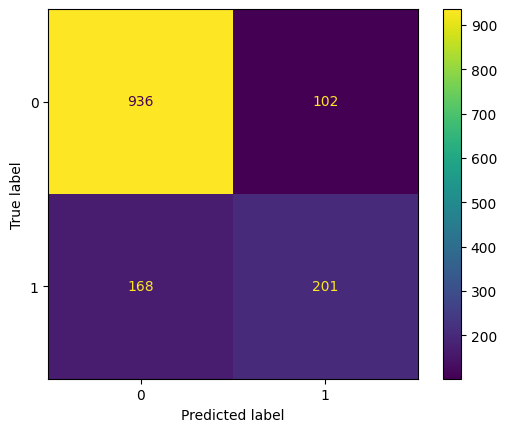

In [21]:
# 可视化混淆矩阵
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

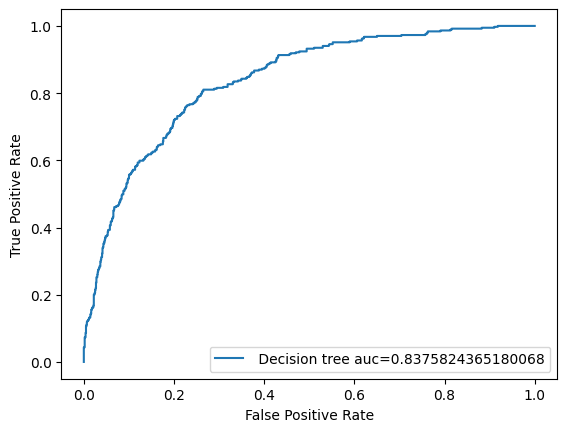

In [22]:
# roc曲线 和 auc值

# 概率预测而不是分类预测
y_train_pred = model.predict_proba(x_train)[:,1]
y_test_pred = model.predict_proba(x_test)[:,1]

from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred) # auc值
pyplot.plot(fpr,tpr,label=" Logistic auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()